# Partie I) Statistiques descriptives et features engineering

In [48]:
#importation des librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#Ouverture du fichier excel contenant les données
data = pd.read_csv('challenge_youtube_toxic (2).csv', sep=";", encoding = "ISO-8859-1")

In [50]:
df = data.copy()

### Nettoyage du dataset

In [51]:
# On supprime les id car ils n'apportent pas d'information 
df.drop(['video_id_court','video_id','channel_id'], axis=1, inplace=True)


### Analyse des données

On affiche la variance afin de voir si le comportement des variables

In [52]:
df.var()

nbrMot                     5.884101e+07
nbrMotInsulte              3.796622e+03
nbrMotAllong               4.565862e+02
nbrMotMAJ                  1.691004e+04
nbrExclMark                1.454610e+04
nbrQuestMark               4.733858e+03
nbrMotMoyenne              1.022679e+03
nbrMotInsulteMoyenne       1.974526e-01
nbrMotAllongMoyenne        9.360445e-02
nbrMotMAJMoyenne           9.698939e+00
nbrExclMarkMoyenne         2.561516e+00
nbrQuestMarkMoyenne        9.031628e-01
thread_count               1.379246e+04
comment_count              1.709353e+04
message_count              5.512686e+04
discussion_count           3.833292e+02
distinct_authors_count     1.969364e+04
authors_3channels_count    3.164188e+03
liked_authors_count        2.561141e+03
subscriberCount            1.428224e+10
viewCount                  4.594538e+15
dtype: float64

**On affiche le boxplot des variables dont la variance est faible**

In [53]:
df2=pd.concat([df['nbrMotInsulteMoyenne'],df['nbrMotAllongMoyenne'],df['nbrMotMAJMoyenne'],df['nbrExclMarkMoyenne'],df['nbrQuestMarkMoyenne']],axis=1)


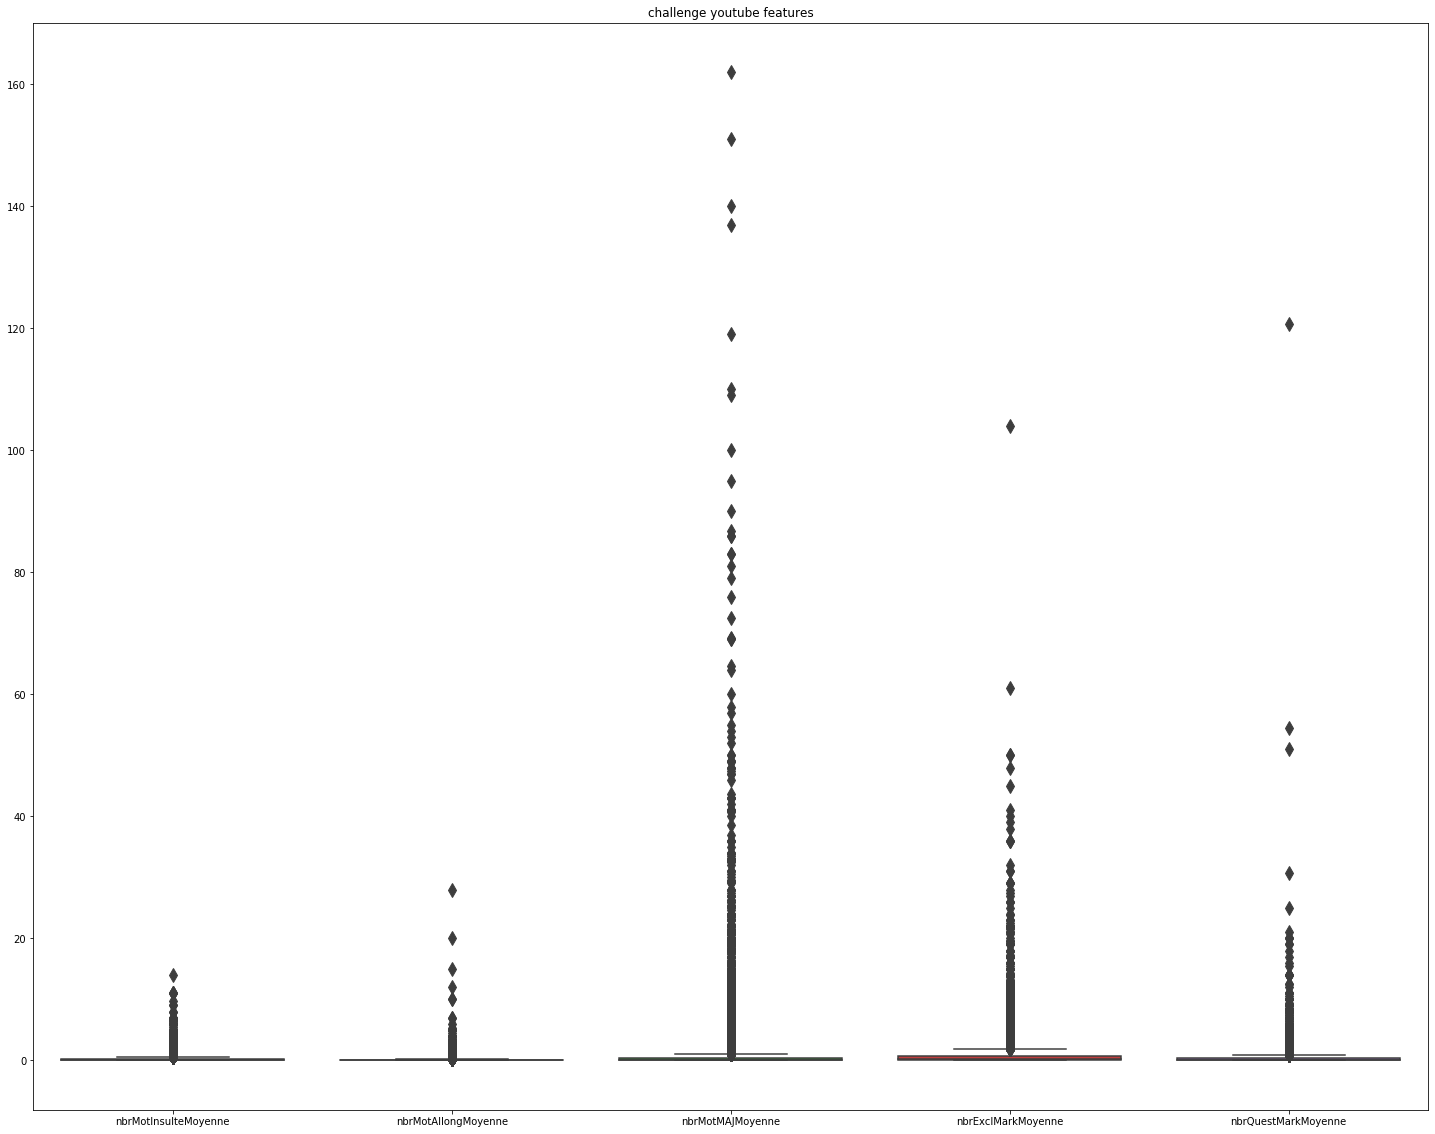

In [54]:
plt.figure(figsize=(25,20))
plt.title('challenge youtube features')
ytb_box=sns.boxplot(data=df2,fliersize=10)
plt.show()

**On affiche la distribution des valeurs prises par certaines features**

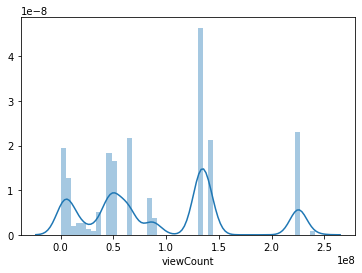

In [55]:
sns.distplot(df['viewCount'])

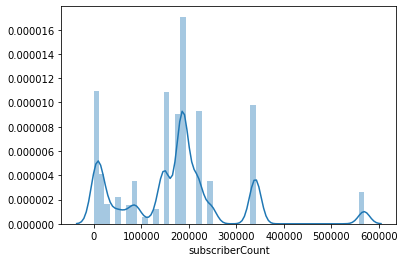

In [56]:
sns.distplot(df['subscriberCount'])

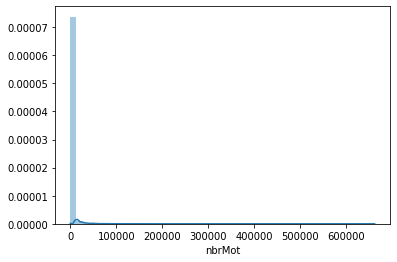

In [57]:
sns.distplot(df['nbrMot'])

In [58]:
df.describe()

,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,nbrMotInsulteMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,...,nbrQuestMarkMoyenne,thread_count,comment_count,message_count,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,subscriberCount,viewCount
count,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,...,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,4.610200e+04
mean,1435.853564,9.418225,3.974665,21.922823,21.823066,13.591276,25.264768,0.189175,0.080849,0.583485,...,0.276134,22.219145,25.700816,47.919960,5.040085,28.726021,14.502646,10.974036,172108.752744,9.255061e+07
std,7670.789422,61.616732,21.367879,130.038591,120.607203,68.803038,31.979351,0.444356,0.305948,3.114312,...,0.950349,117.441322,130.742237,234.791106,19.578795,140.334032,56.251117,50.607716,119508.318824,6.778302e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.109100e+04
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.769231,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,87793.000000,4.635634e+07
50%,72.000000,0.000000,0.000000,0.000000,1.000000,1.000000,18.630032,0.000000,0.000000,0.000000,...,0.040161,3.000000,0.000000,4.000000,0.000000,3.000000,2.000000,1.000000,180173.000000,6.388093e+07
75%,398.000000,3.000000,1.000000,6.000000,9.000000,4.000000,31.000000,0.222222,0.068821,0.400000,...,0.333333,9.000000,5.000000,16.000000,2.000000,11.000000,7.000000,4.000000,217835.000000,1.321257e+08
max,662808.000000,7227.000000,1416.000000,14270.000000,11093.000000,5520.000000,1349.500000,14.000000,28.000000,162.000000,...,120.750000,8734.000000,11195.000000,19336.000000,1235.000000,9837.000000,3762.000000,3732.000000,568615.000000,2.414350e+08


On remarque que pour certaines features, la valeur max est très supérieure à la valeur moyenne ce qui laisse supposer la présence de valeurs abérrantes.

**Utilisons le technique du 1.5*écart interquartiles afin de trouver le nombre de valeurs aberrantes par colonnes**

In [59]:
def nboutliers(col):
    n=0
    a = df[col].quantile(0.25)
    b = df[col].quantile(0.75)
    ecart_interquartile = b-a
    for i in range(df[col].shape[0]):
        if df[col][i]>b+1.5*ecart_interquartile:
            n+=1
    return n

In [60]:
C = ['nbrMot', 'nbrMotInsulte', 'nbrMotAllong', 'nbrMotMAJ', 'nbrExclMark','nbrQuestMark', 'nbrMotMoyenne',
     'nbrMotAllongMoyenne', 'nbrMotMAJMoyenne', 'nbrExclMarkMoyenne','nbrQuestMarkMoyenne','thread_count', 'comment_count', 'message_count','discussion_count', 'distinct_authors_count', 'authors_3channels_count',
    'liked_authors_count','subscriberCount', 'viewCount']

for i in C:
    print("Le nombre de outliers de la variable "+ str(i) +" est: %d" %(nboutliers(i)))

Le nombre de outliers de la variable nbrMot est: 7541
Le nombre de outliers de la variable nbrMotInsulte est: 7205
Le nombre de outliers de la variable nbrMotAllong est: 7955
Le nombre de outliers de la variable nbrMotMAJ est: 7534
Le nombre de outliers de la variable nbrExclMark est: 6701
Le nombre de outliers de la variable nbrQuestMark est: 7329
Le nombre de outliers de la variable nbrMotMoyenne est: 2563
Le nombre de outliers de la variable nbrMotAllongMoyenne est: 5024
Le nombre de outliers de la variable nbrMotMAJMoyenne est: 4204
Le nombre de outliers de la variable nbrExclMarkMoyenne est: 3583
Le nombre de outliers de la variable nbrQuestMarkMoyenne est: 3858
Le nombre de outliers de la variable thread_count est: 6782
Le nombre de outliers de la variable comment_count est: 8322
Le nombre de outliers de la variable message_count est: 7195
Le nombre de outliers de la variable discussion_count est: 7169
Le nombre de outliers de la variable distinct_authors_count est: 6984
Le nombr

**Afin de voir la proportion d'outliers, nous allons supprimer les lignes qui sont considérées comme outliers d'après la méthode ci-dessus**

In [61]:
df.shape

(46102, 24)

In [62]:
dfout=df.copy()

In [63]:
a = df['nbrMotInsulte'].quantile(0.25)
b = df['nbrMotInsulte'].quantile(0.75)
ecart_interquartile = b-a
remove_array = []
for i in range(df['nbrMotInsulte'].shape[0]):
    if df['nbrMotInsulte'][i]>b+1.5*ecart_interquartile:
        remove_array.append(i)
dfout = dfout.drop(remove_array)

In [64]:
dfout.shape

(38897, 24)

**Ainsi 16% du Dataset représente des Outliers**

De plus, les lignes comportant des outliers pour une feature donnée ne seront pas forcément les mêmes pour une autre feature. On décide alors de garder les outliers en gardant en tête leur présence.

### Etude des différentes catégories

0.5930545312567785


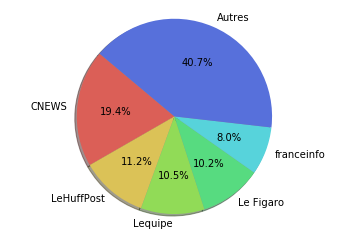

In [65]:
labels = 'CNEWS', 'LeHuffPost', 'Lequipe', 'Le Figaro','franceinfo','Autres'
values = df.channel_name.value_counts(normalize=True).head(10)[:5]
print(sum(values))
sizes = values.append(pd.Series(1-sum(values)))
colors = sns.color_palette("hls", 8)
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

On peut remarquer que presque 60% des vidéos proviennent de seulement 5 chaînes sur les 58 présentes.

In [66]:
type_journal = df.categ_inst.value_counts()[:]

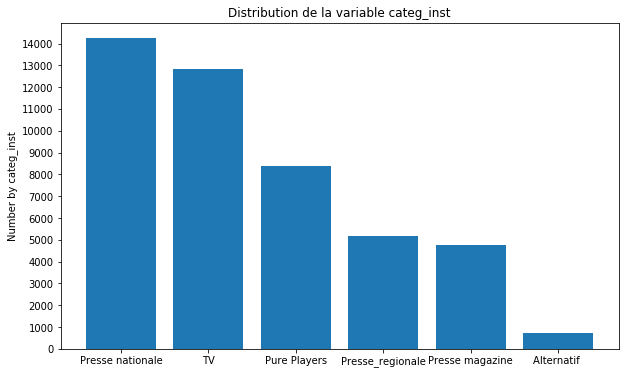

In [67]:
ind = np.arange(6)
plt.figure(figsize=(10,6)) 
plt.bar(ind, type_journal, width=0.8, align='center')

plt.ylabel('Number by categ_inst')
plt.title('Distribution de la variable categ_inst')
plt.xticks(ind, ('Presse nationale', 'TV','Pure Players','Presse_regionale','Presse magazine','Alternatif '))
plt.yticks(np.arange(0, 15000, 1000))
plt.show()

In [68]:
categorie_values = df.categorie_new.value_counts()[:]

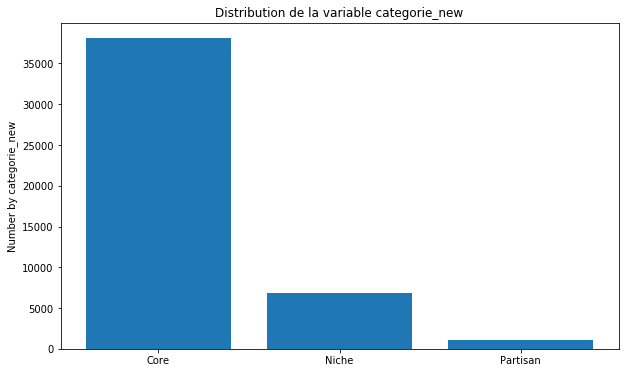

In [69]:
ind = np.arange(3)
plt.figure(figsize=(10,6)) 
plt.bar(ind, categorie_values, width=0.8, align='center')

plt.ylabel('Number by categorie_new')
plt.title('Distribution de la variable categorie_new')
plt.xticks(ind, ('Core', 'Niche','Partisan'))
plt.yticks(np.arange(0, 40000, 5000))
plt.show()

**On remarque que certaines catégories sont majoritairement représentées, la distribution n'est pas uniforme**

### Etude de la corrélation entre les variables

On trace la matrice de corrélation afin de mettre en lumière d'éventuels liens entre variables.

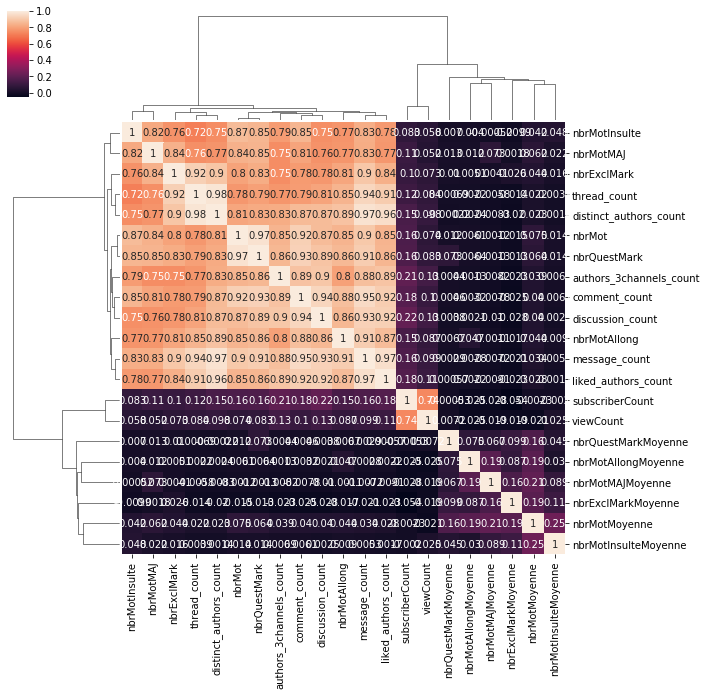

In [70]:
#matrice de correlation
data.corr()
corrMatrix = data.corr()
sns.clustermap(corrMatrix, annot=True)
plt.show()

Le nombre de commentateurs uniques est corrélé avec le nombre de commentaires total et le nombre d’utilisateurs dont les commentaires sont likés (0.97 et 0.96 respectivement). 
On remarque que de nombreuses variables sont corrélées, ce qui rend difficile l'interprétation

**On trace ensuite le pairplot pour essayer de voir une éventuelle corrélation entre deux variables**

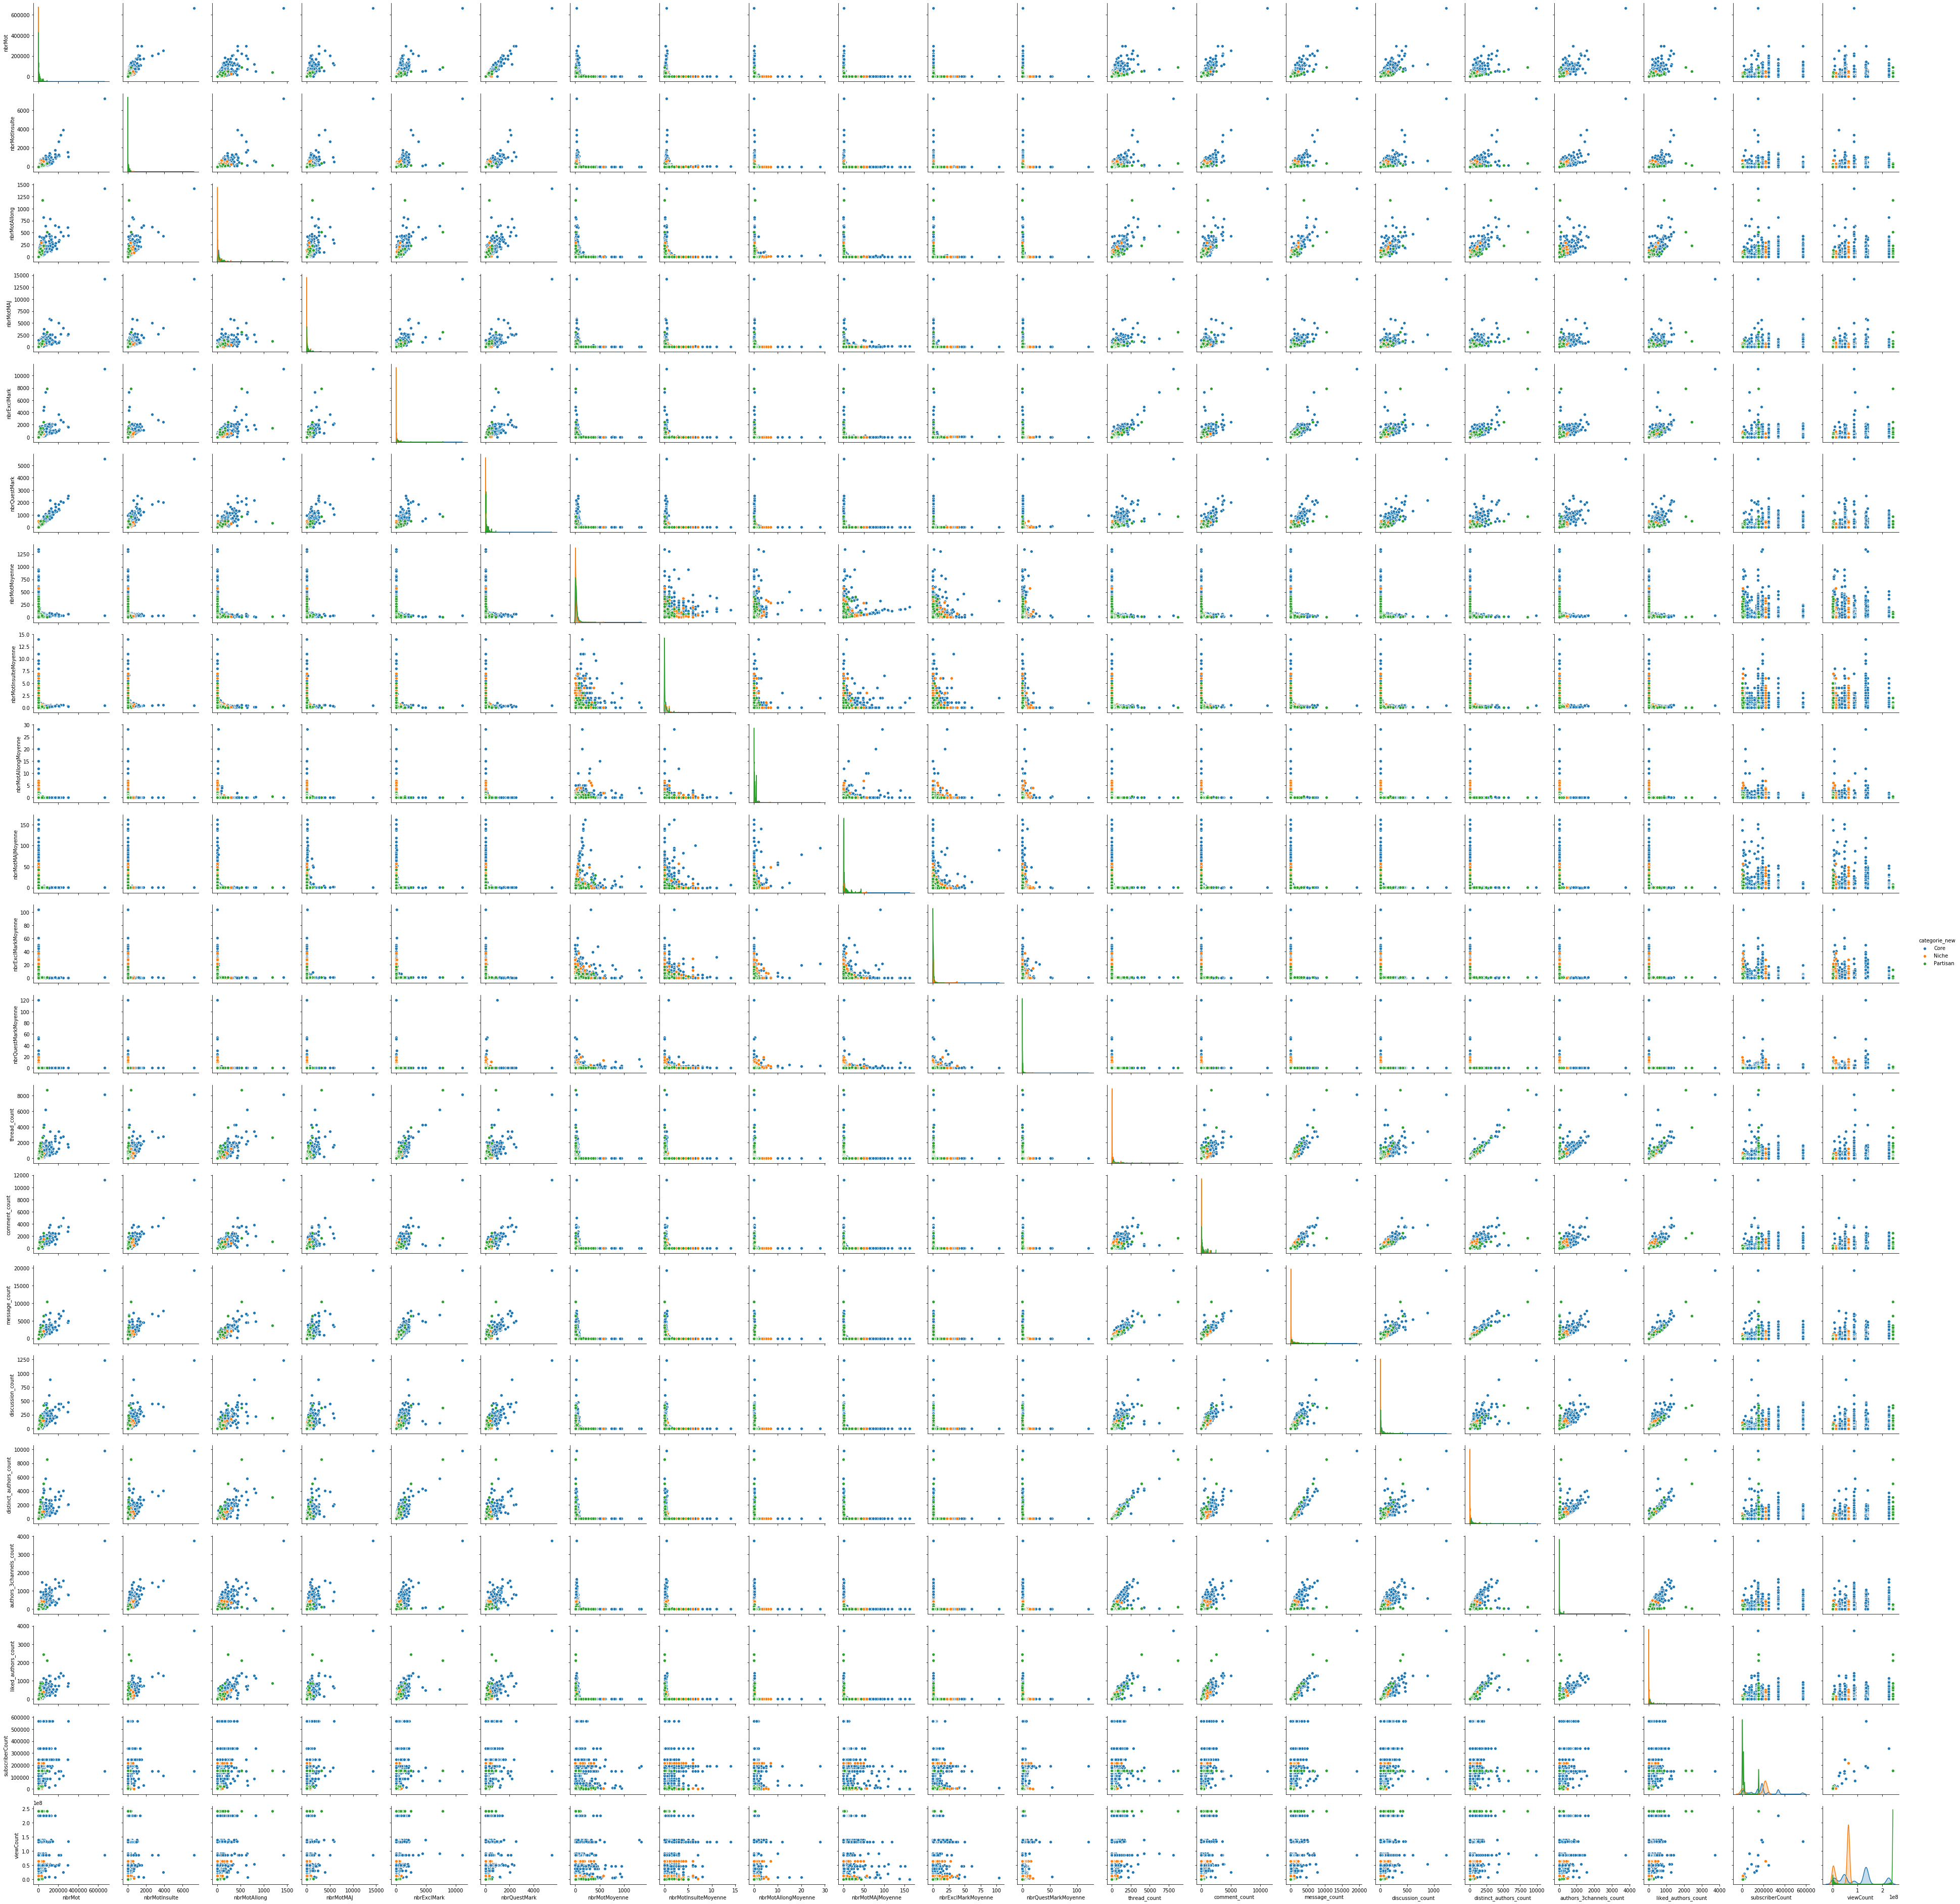

In [71]:
sns.pairplot(df,hue='categorie_new')

Le pairplot nous confirme la difficulté à établir de claires corrélation et à les interpréter notamment

### On encode les variable categ_inst et categ_new 

Afin de minimiser le temps de calcul, on privilégie l'encodage des varaibles plutôt que de leur attribué un numéro (0, 1 et 2 par exemple)

In [72]:
from sklearn.preprocessing import OneHotEncoder
categorical_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [73]:
categorical_columns = pd.DataFrame(categorical_encoder.fit_transform(df[['categ_inst','categorie_new']]))

In [74]:
categorical_columns.index = df.index

In [75]:
categorical_columns.columns =  ['Alternatif', 'Presse magazine', 'Presse nationale',
        'Presse_regionale', 'Pure Players', 'TV', 'Core', 'Niche', 'Partisan']

In [76]:
categorical_columns.head()

,Alternatif,Presse magazine,Presse nationale,Presse_regionale,Pure Players,TV,Core,Niche,Partisan
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
df = pd.concat([df, categorical_columns], axis=1)

In [78]:
df.drop(['categ_inst','categorie_new'],axis=1,inplace=True)

In [79]:
df.head()

,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,nbrMotInsulteMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,...,viewCount,Alternatif,Presse magazine,Presse nationale,Presse_regionale,Pure Players,TV,Core,Niche,Partisan
0,3813,18,4,145,79,60,30.261900,0.142857,0.031746,1.150794,...,225393312,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,28,2,0,1,0,0,9.333333,0.666667,0.000000,0.333333,...,132125693,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3804,68,9,56,75,54,27.565220,0.492754,0.065217,0.405797,...,225393312,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,0,1,2,0,0,2.000000,0.000000,0.500000,1.000000,...,2481100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,737,3,1,18,5,6,32.043478,0.130435,0.043478,0.782609,...,6710737,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [80]:
#On supprime le nom des chaines pour la suite afin de pouvoir utiliser nos futurs models pour une vidéo appartenant à une autre chaine et pour ne pas stigmatiser une chaine en lui attribuant le caractére "toxique" ce qui pourrait induire en erreur pour d'autres vidéos de la même chaîne
df.drop('channel_name', axis=1, inplace=True)

Ainsi, nous avons ajouté une variable binaire pour chaque categorie afin de simplifier la lisibilité et d'augmenter la vitesse de calcul.